### Data Exploration

Last edited: 4/15/2020, 2pm
Notes: Add markdown with explanations of data. Add titles to boxplots. Look at spread of pre-imputed data (use drop NaN function) - help to decide if median or mean. 

In [13]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import cov

import sklearn as sk
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

import math

In [23]:
#Load cleaned data set (this cell taken from Feature_Engineering)
from utils import intake_data
data = intake_data()
#adjust variables
data.rename(columns = {'death = 1 ': 'death'}, inplace=True)
#create X and Y dataframes
print(data.head())
data_X = data.iloc[:, :16]
data_X['days'] = data['days']
data_X['days.1'] = data['days.1']
data_X['ventilator weaning = 1'] = data['ventilator weaning = 1']
data_X['VFD'] = data['VFD ']
data_Y = data.iloc[:, 17] #df with class labels
print(data_Y.head())
data_X.head()

    age  sex  Alb   PLT      WBC   CRP  APACHE II  SOFA  McCabe  PaO2/FiO2  \
0  79.0    0  2.3  10.8   4000.0  17.8       24.0   8.0     1.0      108.0   
1  83.0    0  4.4  13.5  10200.0   8.9       16.0   6.0     1.0       78.0   
2  70.0    0  2.7  10.8   5300.0  25.3       22.0   7.0     1.0       70.9   
3  61.0    0  3.3   8.8   1800.0  22.2       26.0   7.0     1.0       59.2   
4  81.0    0  3.1  26.2  10600.0  17.0       19.0   4.0     1.0       83.6   

   ...  CT score  PEEP        PIP         TV  DARDS = 1  days  death  days.1  \
0  ...     191.6  24.0  25.948052  428.05036        0.0  21.0    1.0    28.0   
1  ...     213.3   5.0  10.000000  360.00000        0.0  21.0    1.0    28.0   
2  ...     221.7  18.0  24.000000  525.00000        0.0   8.0    1.0    28.0   
3  ...     211.6  10.0  24.000000  480.00000        0.0  11.0    1.0    28.0   
4  ...     234.9   5.0  10.000000  625.00000        0.0   6.0    1.0    28.0   

   ventilator weaning = 1  VFD   
0               

,age,sex,Alb,PLT,WBC,CRP,APACHE II,SOFA,McCabe,PaO2/FiO2,LDH,CT score,PEEP,PIP,TV,DARDS = 1,days,days.1,ventilator weaning = 1,VFD
0,79.0,0,2.3,10.8,4000.0,17.8,24.0,8.0,1.0,108.0,339.0,191.6,24.0,25.948052,428.05036,0.0,21.0,28.0,0.0,0.0
1,83.0,0,4.4,13.5,10200.0,8.9,16.0,6.0,1.0,78.0,385.0,213.3,5.0,10.000000,360.00000,0.0,21.0,28.0,0.0,0.0
2,70.0,0,2.7,10.8,5300.0,25.3,22.0,7.0,1.0,70.9,461.0,221.7,18.0,24.000000,525.00000,0.0,8.0,28.0,0.0,0.0
3,61.0,0,3.3,8.8,1800.0,22.2,26.0,7.0,1.0,59.2,227.0,211.6,10.0,24.000000,480.00000,0.0,11.0,28.0,0.0,0.0
4,81.0,0,3.1,26.2,10600.0,17.0,19.0,4.0,1.0,83.6,680.0,234.9,5.0,10.000000,625.00000,0.0,6.0,28.0,0.0,0.0


### Class Label Distribution

In [15]:
print("Death = 1:", sum(data_Y == 1.0))
print("Death = 0:", sum(data_Y == 0.0))

Death = 1: 69
Death = 0: 128


### Pearson Correlation Coefficients Between Each Feature and Class Labels

In [24]:
print(len(data_Y))

for col in data_X: 
    corr, corr2 = pearsonr(data_X[col], data_Y)
    print(col, '   ', round(corr,2))
    

197
age     0.15
sex     -0.09
Alb     -0.19
PLT     -0.14
WBC     0.02
CRP     0.09
APACHE II     0.08
SOFA     0.09
McCabe     0.12
PaO2/FiO2     -0.04
LDH     0.16
CT score     0.24
PEEP     0.08
PIP     -0.07
TV     0.04
DARDS = 1     -0.14
days     -0.9
days.1     0.65
ventilator weaning = 1     -0.68
VFD     -0.63


### Pearson Correlation Coefficients Between Features That Are Above 0.5

In [26]:
found = []
for col1 in data_X: 
    for col2 in data_X: 
        corr, corr2 = pearsonr(data_X[col1], data_X[col2])
        if ((corr > .5) and (corr < .98)): 
            if corr not in found: 
                print(col1, " & ", col2, " : ", corr)
        found.append(corr)

APACHE II  &  SOFA  :  0.6005432947471825
days  &  ventilator weaning = 1  :  0.6505271040959787
days  &  VFD  :  0.5996012050990097
ventilator weaning = 1  &  VFD  :  0.9105951512701016


### Standard Statistics for Each Feature

(Noteworthy features highlighted and expanded upon in later cells)

In [74]:
for col in data_X:
    print('\ncolumn:', col)
    print('feature description:', "")
    
    maxm = data_X[col].max()
    minm = data_X[col].min()
    print('max:', math.trunc(maxm))
    print('min:', math.trunc(minm))
    print('range:', math.trunc(maxm-minm))

    print("(Measures of Central Tendency)")
    print('mean:', math.trunc(data_X[col].mean()))
    print('median:', math.trunc(data_X[col].median()))
    print('mode:', (data_X[col].mode()))

    print("(Measures of Dispersion)")
    print('variance:', math.trunc(data_X[col].var()))
    print('standard deviation:', math.trunc(data_X[col].std()))
    quartiles = data_X[col].quantile([0.25, 0.5, 0.75])
    first_q = int(quartiles[0.25])
    third_q = int(quartiles[0.75])
    iqr = int(quartiles[0.75]-quartiles[0.25])
    print('first quartile:', first_q)
    print('third quartile:', third_q)
    print('inner quartile range:', iqr)
    num_out = sum(data_X[col] > (third_q + 1.5*iqr)) + sum(data_X[col] < (first_q - 1.5*iqr))
    print('number of outliers:', num_out)


column: age
feature description: 
max: 97
min: 19
range: 78
(Measures of Central Tendency)
mean: 73
median: 76
mode: 0    83.0
dtype: float64
(Measures of Dispersion)
variance: 142
standard deviation: 11
first quartile: 67
third quartile: 83
inner quartile range: 16
number of outliers: 7

column: sex
feature description: 
max: 1
min: 0
range: 1
(Measures of Central Tendency)
mean: 0
median: 0
mode: 0    0
dtype: int64
(Measures of Dispersion)
variance: 0
standard deviation: 0
first quartile: 0
third quartile: 1
inner quartile range: 1
number of outliers: 0

column: Alb
feature description: 
max: 4
min: 1
range: 3
(Measures of Central Tendency)
mean: 2
median: 2
mode: 0    3.1
dtype: float64
(Measures of Dispersion)
variance: 0
standard deviation: 0
first quartile: 2
third quartile: 3
inner quartile range: 0
number of outliers: 91

column: PLT
feature description: 
max: 57
min: 0
range: 57
(Measures of Central Tendency)
mean: 19
median: 18
mode: 0    20.1
dtype: float64
(Measures of Di

### Noteworthy Variables - Univariate Analysis

In [25]:
### Sex

print("Male:", sum(data_X["sex"] == 0))
print("Female:", sum(data_X["sex"] == 1))

Male: 123
Female: 74


AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 67
third quartile: 83
inner quartile range: 16
number of outliers: 7


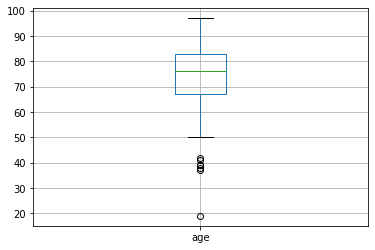

In [11]:
### Age

print(data_X.boxplot('age'))
quartiles = data_X['age'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['age'] > (third_q + 1.5*iqr)) + sum(data_X['age'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 2
third quartile: 3
inner quartile range: 0
number of outliers: 91


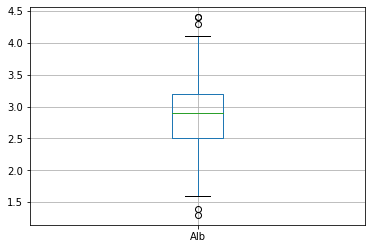

In [13]:
### Alb

print(data_X.boxplot('Alb'))
quartiles = data_X['Alb'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['Alb'] > (third_q + 1.5*iqr)) + sum(data_X['Alb'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 254
third quartile: 461
inner quartile range: 207
number of outliers: 11


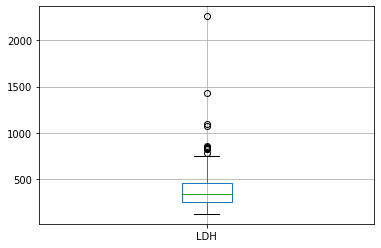

In [18]:
### LDH

print(data_X.boxplot('LDH'))
quartiles = data_X['LDH'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['LDH'] > (third_q + 1.5*iqr)) + sum(data_X['LDH'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 8
third quartile: 10
inner quartile range: 2
number of outliers: 33


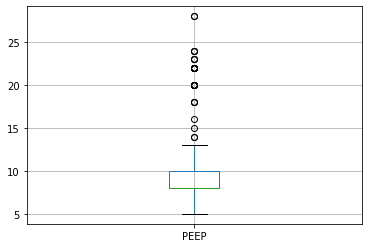

In [19]:
### PEEP

print(data_X.boxplot('PEEP'))
quartiles = data_X['PEEP'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['PEEP'] > (third_q + 1.5*iqr)) + sum(data_X['PEEP'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 20
third quartile: 25
inner quartile range: 5
number of outliers: 24


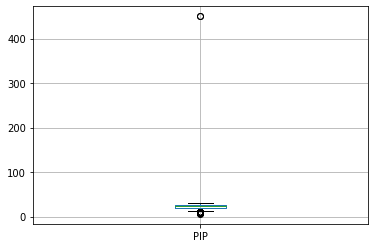

In [21]:
### PIP

print(data_X.boxplot('PIP'))
quartiles = data_X['PIP'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['PIP'] > (third_q + 1.5*iqr)) + sum(data_X['PIP'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)


AxesSubplot(0.125,0.125;0.775x0.755)
first quartile: 380
third quartile: 450
inner quartile range: 70
number of outliers: 18


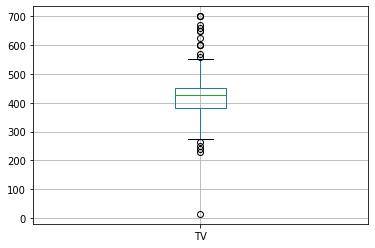

In [23]:
### TV

print(data_X.boxplot('TV'))
quartiles = data_X['TV'].quantile([0.25, 0.5, 0.75])
first_q = int(quartiles[0.25])
third_q = int(quartiles[0.75])
iqr = int(quartiles[0.75]-quartiles[0.25])
print('first quartile:', first_q)
print('third quartile:', third_q)
print('inner quartile range:', iqr)
num_out = sum(data_X['TV'] > (third_q + 1.5*iqr)) + sum(data_X['TV'] < (first_q - 1.5*iqr))
print('number of outliers:', num_out)

### Anomaly Detection : fit to data_X or x_train???


In [24]:
from sklearn.model_selection import train_test_split

#split into test and train
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = .2)

In [27]:
# Relative Density
anom = sk.neighbors.LocalOutlierFactor()
anom_results = anom.fit_predict(data_X)
anom_indices = []
for i in range(len(anom_results)): 
    if anom_results[i] == (-1): 
        anom_indices.append(i)
print(anom_indices)

[18, 26, 63, 70, 94, 96, 103, 135, 138, 143, 144, 145, 159, 162, 166, 169, 170, 175, 180, 189]


C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [15]:
# Isolation Forest
anom2 = sk.ensemble.IsolationForest()
anom2_results = anom2.fit_predict(data_X)
anom2_indices = []
for i in range(len(anom2_results)): 
    if anom2_results[i] == (-1): 
        anom2_indices.append(i)
print(anom2_indices)

[59, 74, 75, 78, 87, 95, 105, 128, 135, 148, 149, 154, 162, 163, 167, 171, 172, 184, 189, 195]


C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\tbweb\Documents\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [28]:
# I'm thinking if indices are in all or both anomaly detections then they should be removed?